In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('carclaims.csv')
print(df.shape)
df.head()

(15420, 33)


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,"more than 69,000",1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,"more than 69,000",2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,"more than 69,000",3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,"20,000 to 29,000",4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,"more than 69,000",5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [48]:
df.drop('PolicyNumber', axis=1, inplace=True)
df.shape

(15420, 32)

In [49]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,16.000000,700.000000,4.000000,1996.000000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  RepNumber             15420 non-null

### Target

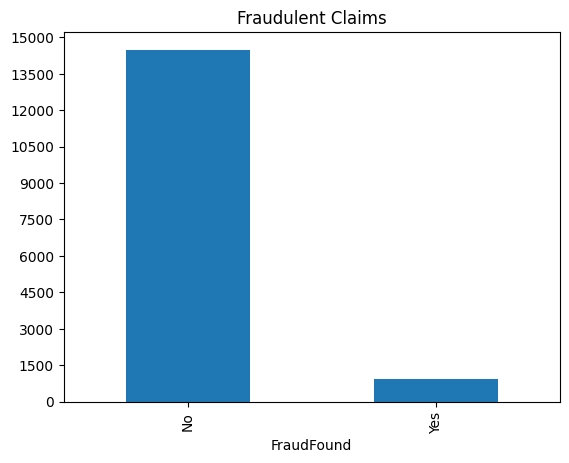

In [51]:
df['FraudFound'].value_counts().plot(kind='bar')
plt.title('Fraudulent Claims')
plt.yticks(np.arange(0, 16000, 1500))
plt.show()

Need to oversample minority class: "Yes" FraudFound

### Variable Type

#### Numerical

In [52]:
num_var = [var for var in df.columns if df[var].dtype != 'O']
print(len(num_var))
num_var

7


['WeekOfMonth',
 'WeekOfMonthClaimed',
 'Age',
 'RepNumber',
 'Deductible',
 'DriverRating',
 'Year']

Year
1994    6142
1995    5195
1996    4083
Name: FraudFound, dtype: int64


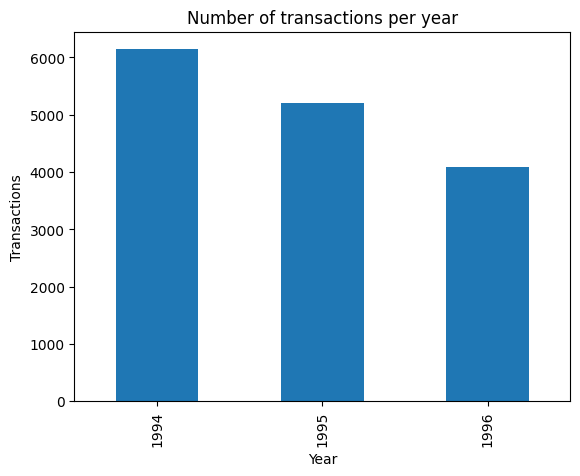

In [ ]:
print(df.groupby("Year")['FraudFound'].size())
df.groupby("Year")['FraudFound'].size().plot(kind='bar')
plt.ylabel('Transactions')
plt.title('Number of transactions per year')
plt.yticks(np.arange(0,7000,1000))
plt.show()

Year  FraudFound
1994  No            5733
      Yes            409
1995  No            4894
      Yes            301
1996  No            3870
      Yes            213
dtype: int64


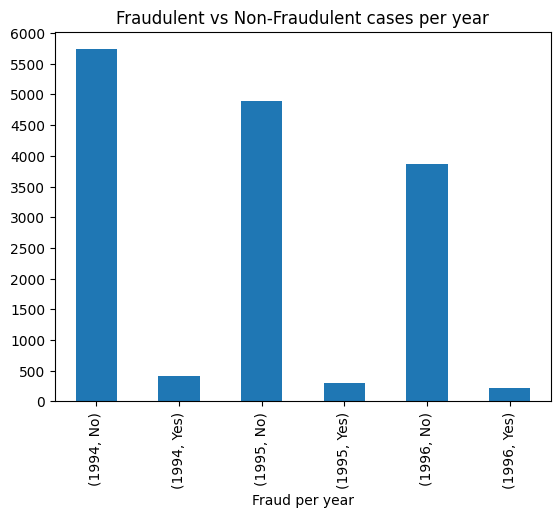

In [147]:
print(df.groupby(['Year','FraudFound']).size())
df.groupby(['Year','FraudFound']).size().plot(kind='bar')
plt.xlabel('Fraud per year')
plt.title('Fraudulent vs Non-Fraudulent cases per year')
plt.yticks(np.arange(0,6500,500))
plt.show()

WeekOfMonthClaimed
1    3450
2    3720
3    3583
4    3433
5    1234
Name: FraudFound, dtype: int64


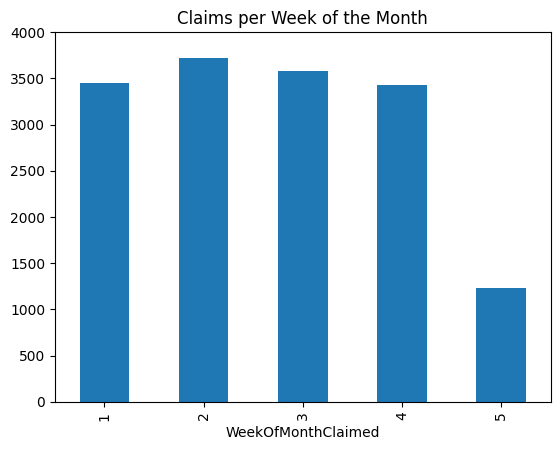

In [148]:
print(df.groupby('WeekOfMonthClaimed')['FraudFound'].size())
df.groupby('WeekOfMonthClaimed')['FraudFound'].size().plot(kind='bar')
plt.title('Claims per Week of the Month')
plt.yticks(np.arange(0, 4500, 500))
plt.show()

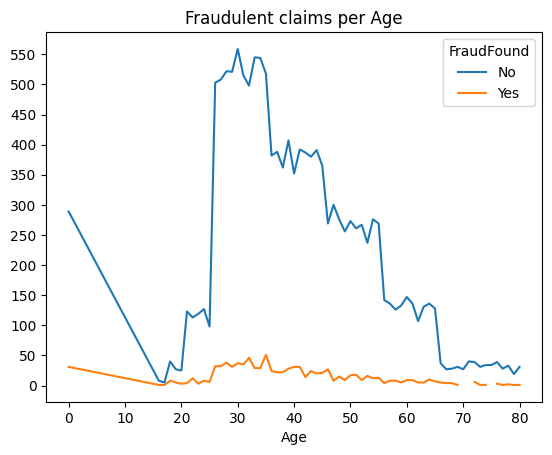

In [141]:
#df.groupby(['Age','FraudFound']).size().xs('Yes', level='FraudFound').plot(kind='line')
df.groupby(['Age','FraudFound']).size().unstack('FraudFound').plot(kind='line')
plt.title('Fraudulent claims per Age')
plt.yticks(np.arange(0, 600, 50))
plt.show()

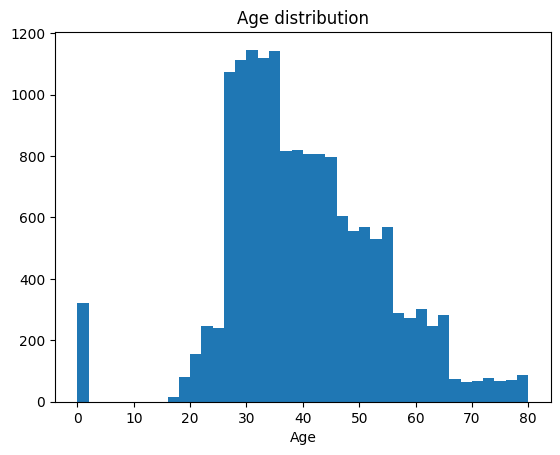

In [149]:
plt.hist(df['Age'], bins=40)
plt.title('Age distribution')
plt.xlabel('Age')
plt.show()

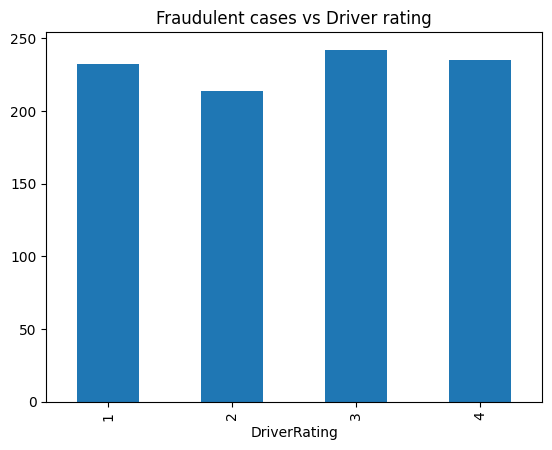

In [ ]:
df.groupby(['DriverRating','FraudFound']).size().xs('Yes', level='FraudFound').plot(kind='bar')
plt.title('Fraudulent cases vs Driver rating')
plt.show()

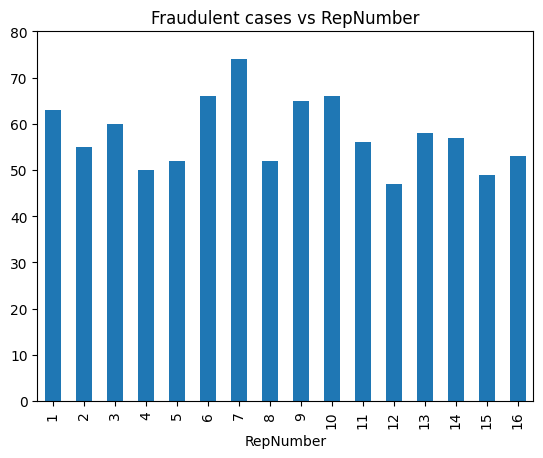

In [146]:
df.groupby(['RepNumber','FraudFound']).size().xs('Yes', level='FraudFound').plot(kind='bar')
plt.title('Fraudulent cases vs RepNumber')
plt.yticks(np.arange(0, 85, 10))
plt.show()

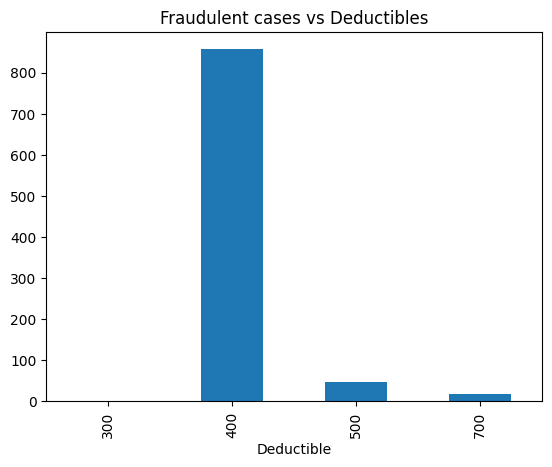

In [152]:
df.groupby(['Deductible','FraudFound']).size().xs('Yes', level='FraudFound').plot(kind='bar')
plt.title('Fraudulent cases vs Deductibles')
plt.show()

#### Numerical - Discrete

In [186]:
discrete_var = [var for var in num_var if len(df[var].unique()) < 20 and 'Year' not in var]
print(len(discrete_var), 'discrete vars')
df[discrete_var].head()

5 discrete vars


,WeekOfMonth,WeekOfMonthClaimed,RepNumber,Deductible,DriverRating
0,5,1,12,300,1
1,3,4,15,400,4
2,5,2,7,400,3
3,2,1,4,400,2
4,5,2,3,400,1


#### Numerical - Continuous

In [187]:
cont_var = [var for var in num_var if var not in discrete_var]
print(len(cont_var), 'continuous vars')
df[cont_var].head()

2 continuous vars


,Age,Year
0,21,1994
1,34,1994
2,47,1994
3,65,1994
4,27,1994


#### Categorical

In [57]:
cat_var = [var for var in df.columns if var not in num_var and var != 'FraudFound']
print(len(cat_var))
cat_var

24


['Month',
 'DayOfWeek',
 'Make',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'Sex',
 'MaritalStatus',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'Days:Policy-Accident',
 'Days:Policy-Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange-Claim',
 'NumberOfCars',
 'BasePolicy']

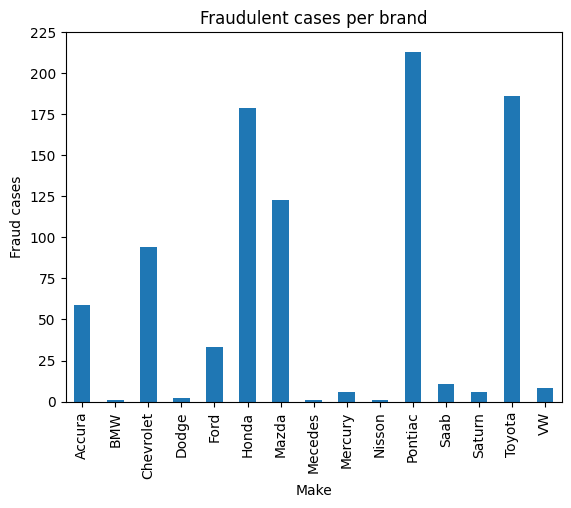

In [174]:
df.groupby(['Make', 'FraudFound']).size().xs('Yes', level='FraudFound').plot(kind='bar')
plt.title('Fraudulent cases per brand')
plt.ylabel('Fraud cases')
plt.yticks(np.arange(0, 250, 25))
plt.show()

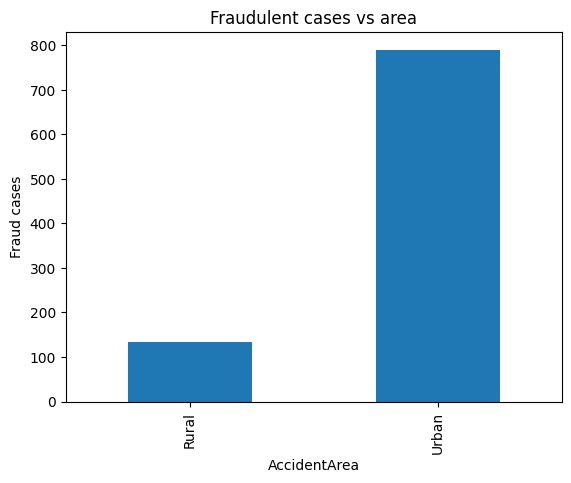

In [161]:
df.groupby(['AccidentArea', 'FraudFound']).size().xs('Yes', level='FraudFound').plot(kind='bar')
plt.title('Fraudulent cases vs area')
plt.ylabel('Fraud cases')
plt.show()

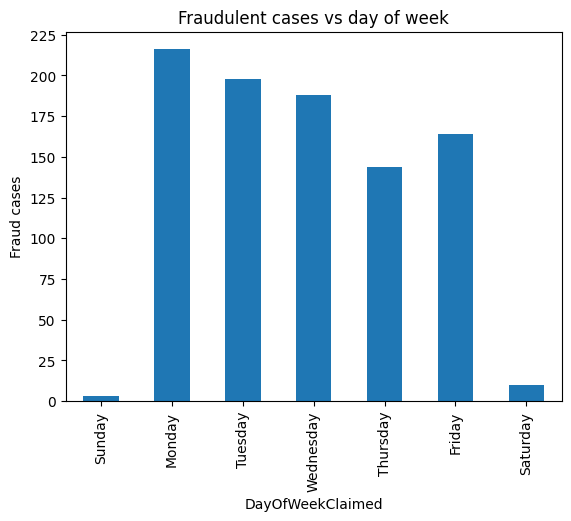

In [203]:
days_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df.groupby(['DayOfWeekClaimed', 'FraudFound']).size().xs('Yes', level='FraudFound').reindex(days_order).plot(kind='bar')
plt.title('Fraudulent cases vs day of week')
plt.yticks(np.arange(0, 250, 25))
plt.ylabel('Fraud cases')
plt.show()

### Missing data

In [60]:
missing = [var for var in df.columns if df[var].isnull().sum() > 0]
missing

[]